<a href="https://colab.research.google.com/github/FaldoFajri/padang_food_image_classification/blob/main/padang_food_image_classification_using_model_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dataset from Kaggle

In [ ]:
! pip install opendatasets --quiet

Before downloading the dataset, enter your username and kaggle account key, the method can be seen in http://bit.ly/kaggle-creds

In [ ]:
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/faldoae/padangfood'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: faldoae
Your Kaggle Key: ··········


100%|██████████| 114M/114M [00:02<00:00, 57.1MB/s]


In [ ]:
import numpy as np
import pandas as pd 

import os

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

# Splitting Dataset

In [ ]:
#create a new folder that is used to enter the results of the split dataset

!mkdir datasplit

In [ ]:
#create variables by defining the location of the raw dataset folder and the splitting dataset folder

dataraw = '/content/padangfood/dataset_padang_food'
datasplit = '/content/datasplit'

In [ ]:
#dataset splitting process with a ratio of 70% train data, 20% validation data and 10% test data

!pip install split-folders #install 
import splitfolders
splitfolders.ratio(dataraw, output=datasplit, seed=1337, ratio=(.6,.3,.1),group_prefix=None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 993 files [00:00, 1687.24 files/s]


In [ ]:
test_dir = "./datasplit/test"
train_dir = "./datasplit/train"
val_dir = "./datasplit/val"

# Modelling Machine Learning

In [ ]:
#DISINI SAYA MENGGUNAKAN MODEL VGG16

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(512, activation='relu')
dropout = layers.Dropout(0.5)
prediction_layer = layers.Dense(9, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dropout,
    prediction_layer
])

# Augmentation Data

In [ ]:
image_shape = (224,224,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 591 images belonging to 9 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 293 images belonging to 9 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 109 images belonging to 9 classes.


# Train Machine Learning Model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00001),
              metrics=['acc'])

results = model.fit(train_image_gen,epochs=150, validation_data=val_image_gen)

Epoch 1/150
19/19 [==============================] - 37s 1s/step - loss: 0.5211 - acc: 0.0964 - val_loss: 0.3485 - val_acc: 0.1502
Epoch 2/150
19/19 [==============================] - 18s 931ms/step - loss: 0.3844 - acc: 0.1354 - val_loss: 0.3437 - val_acc: 0.2253
Epoch 3/150
19/19 [==============================] - 17s 908ms/step - loss: 0.3689 - acc: 0.1421 - val_loss: 0.3267 - val_acc: 0.2867
Epoch 4/150
19/19 [==============================] - 18s 970ms/step - loss: 0.3434 - acc: 0.2521 - val_loss: 0.3162 - val_acc: 0.3447
Epoch 5/150
19/19 [==============================] - 22s 1s/step - loss: 0.3383 - acc: 0.2470 - val_loss: 0.3059 - val_acc: 0.4096
Epoch 6/150
19/19 [==============================] - 17s 906ms/step - loss: 0.3212 - acc: 0.2860 - val_loss: 0.2967 - val_acc: 0.4642
Epoch 7/150
19/19 [==============================] - 17s 914ms/step - loss: 0.3111 - acc: 0.3232 - val_loss: 0.2914 - val_acc: 0.4676
Epoch 8/150
19/19 [==============================] - 17s 923ms/step 

In [ ]:
plot_df = pd.DataFrame(model.history.history)
plot_df

,loss,acc,val_loss,val_acc
0,0.521116,0.096447,0.348451,0.150171
1,0.384403,0.135364,0.343674,0.225256
2,0.368931,0.142132,0.326711,0.286689
3,0.343433,0.252115,0.316243,0.344710
4,0.338254,0.247039,0.305921,0.409556
...,...,...,...,...
145,0.072801,0.950931,0.153097,0.754266
146,0.072933,0.942470,0.146201,0.778157
147,0.072186,0.950931,0.147050,0.761092
148,0.069602,0.961083,0.152271,0.774744


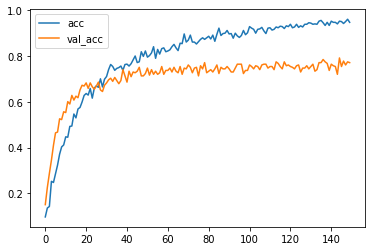

In [ ]:
plot_df[['acc', 'val_acc']].plot()

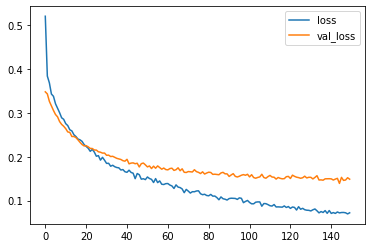

In [ ]:
plot_df[['loss', 'val_loss']].plot()

# Testing the model with Test Data

In [ ]:
#we can test our model on testing data
results = model.evaluate(test_image_gen, verbose=0)

print("    Test Loss : {:.2f}%".format(results[0] * 100))
print("Test Accuracy : {:.2f}%".format(results[1] * 100))

    Test Loss : 12.56%
Test Accuracy : 81.65%


# Classification Metrics

In [ ]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions,target_names=['ayam_goreng', 'ayam_pop', 'daging_rendang', 'dendeng_batokok', 'gulai_ikan', 'gulai_tambusu', 'gulai_tunjang', 'telur_balado', 'telur_dadar']))

                 precision    recall  f1-score   support

    ayam_goreng       0.75      0.82      0.78        11
       ayam_pop       0.86      0.92      0.89        13
 daging_rendang       0.64      0.82      0.72        11
dendeng_batokok       1.00      0.67      0.80        12
     gulai_ikan       1.00      0.83      0.91        12
  gulai_tambusu       0.89      0.67      0.76        12
  gulai_tunjang       0.71      0.77      0.74        13
   telur_balado       0.64      0.75      0.69        12
    telur_dadar       0.93      1.00      0.96        13

       accuracy                           0.81       109
      macro avg       0.82      0.81      0.81       109
   weighted avg       0.83      0.81      0.81       109



Confusion matrix


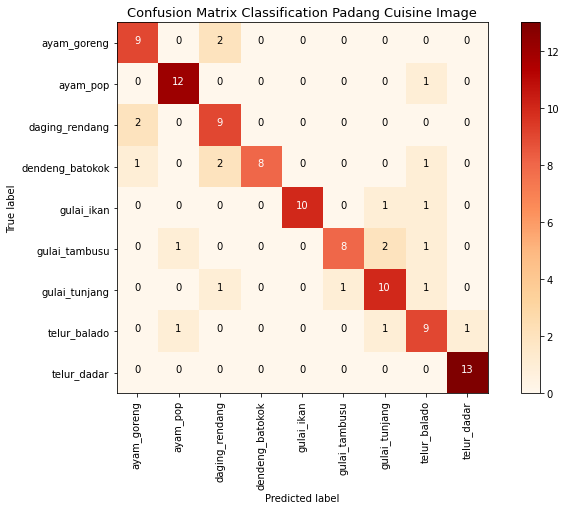

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix Classification Padang Cuisine Image',
                          cmap=plt.cm.OrRd):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    #print(cm)
    plt.rcParams['figure.figsize'] = (10.0, 7.0)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 13)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)